## Time series of Atkin et al. respiration run - grid cells that die off

### Libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


### Plotting options

In [2]:
min_lat_plotting = -90
max_lat_plotting = 90
min_lon_plotting = -180
max_lon_plotting = 180
geog_range_plotting = [min_lon_plotting, max_lon_plotting, min_lat_plotting, max_lat_plotting]

pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']


# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

### Load FATES run

In [4]:
# Old allometries and 1.2 storage
#fates_history_file_def = '/compyfs/need138/elm_runs/atkinr1_ensemble_default.Ec63cce2-Fc8e49cb.2023-01-03/run/lnd/hist/atkinr1_ensemble_default.Ec63cce2-Fc8e49cb.2023-01-03.elm.h0.start.nc'

# New allometries and 1.6 storage
fates_history_file_def = '/compyfs/need138/elm_runs/atkin_storage.Ec63cce2-F0866bca.2023-01-06/run/atkin_storage.Ec63cce2-F0866bca.2023-01-06.elm.h0.start.nc'
fates_def = xr.open_dataset(fates_history_file_def,  decode_times=False)

nyears = int(len(fates_def.variables['time'])/12)
n_lat = len(fates_def.variables['lat'])
n_lon = len(fates_def.variables['lon'])

tave_start = (nyears-5)*12
tave_stop = nyears*12

cohort_size_bins = fates_def.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

time = fates_def.variables['time'] / 365.


### Time series of aboveground biomass

(77, 46, 72)


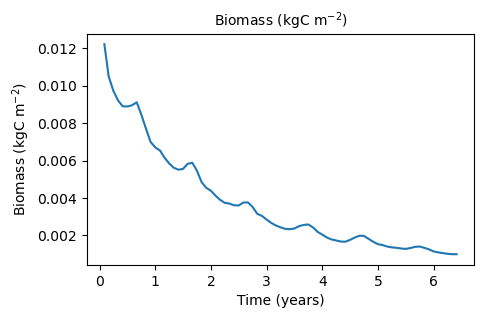

In [5]:
biomass = fates_def.FATES_VEGC
print(biomass.shape)

biomass = biomass[:,22,57]

fig3, ((f3ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(5,3))

### AGB
f3ax0.plot(time,biomass)
f3ax0.set_title(r'Biomass (kgC m$^{-2}$)', fontsize = 10)
f3ax0.set_ylabel('Biomass (kgC m$^{-2}$)', fontsize = 10)
f3ax0.set_xlabel('Time (years)', fontsize=10)
f3ax0.tick_params(labelsize=10)


### Growth

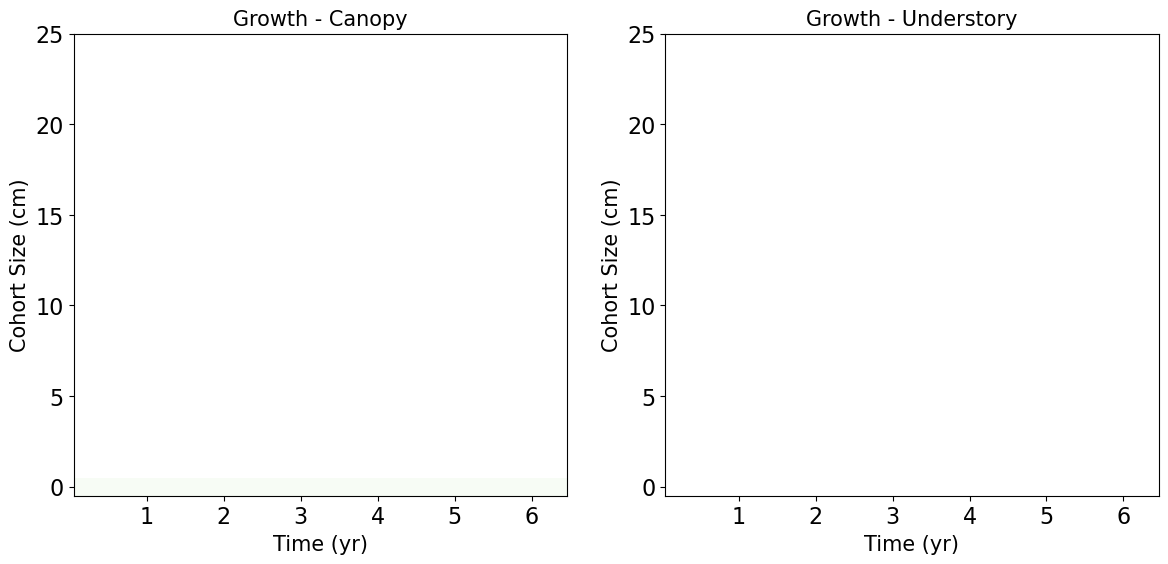

In [6]:
ddbh_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_DDBH_CANOPY_SZPF, fates_def)
ddbh_def = ddbh_sz_by_pft_def[:,0,:,:,:]  # PFT 1
nplnt_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_CANOPY_SZPF, fates_def)
nplnt_def = nplnt_sz_by_pft_def[:,0,:,:,:]
ddbh_def = ddbh_def/nplnt_def
ddbh_def = ddbh_def[:,22,57,:]

ddbh_sz_by_pft_ustory_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_USTORY_SZPF, fates_def)
ddbh_ustory_def = ddbh_sz_by_pft_ustory_def[:,0,:,:,:]  # PFT 1
nplnt_sz_by_pft_ustory_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_USTORY_SZPF, fates_def)
nplnt_ustory_def = nplnt_sz_by_pft_ustory_def[:,0,:,:,:]
ddbh_ustory_def = ddbh_ustory_def/nplnt_ustory_def
ddbh_ustory_def = ddbh_ustory_def[:,22,57,:]

levels = np.arange(0.,1., 0.1)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

im = f1ax0.pcolormesh(time, cohort_size_bins[0:5], ddbh_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'Growth - Canopy', fontsize=15)
f1ax0.set_xlabel('Time (yr)', fontsize=15)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax0.tick_params(labelsize=16)

im = f1ax1.pcolormesh(time, cohort_size_bins[0:5], ddbh_ustory_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'Growth - Understory', fontsize=15)
f1ax1.set_xlabel('Time (yr)', fontsize=15)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax1.tick_params(labelsize=16)

### Mortality

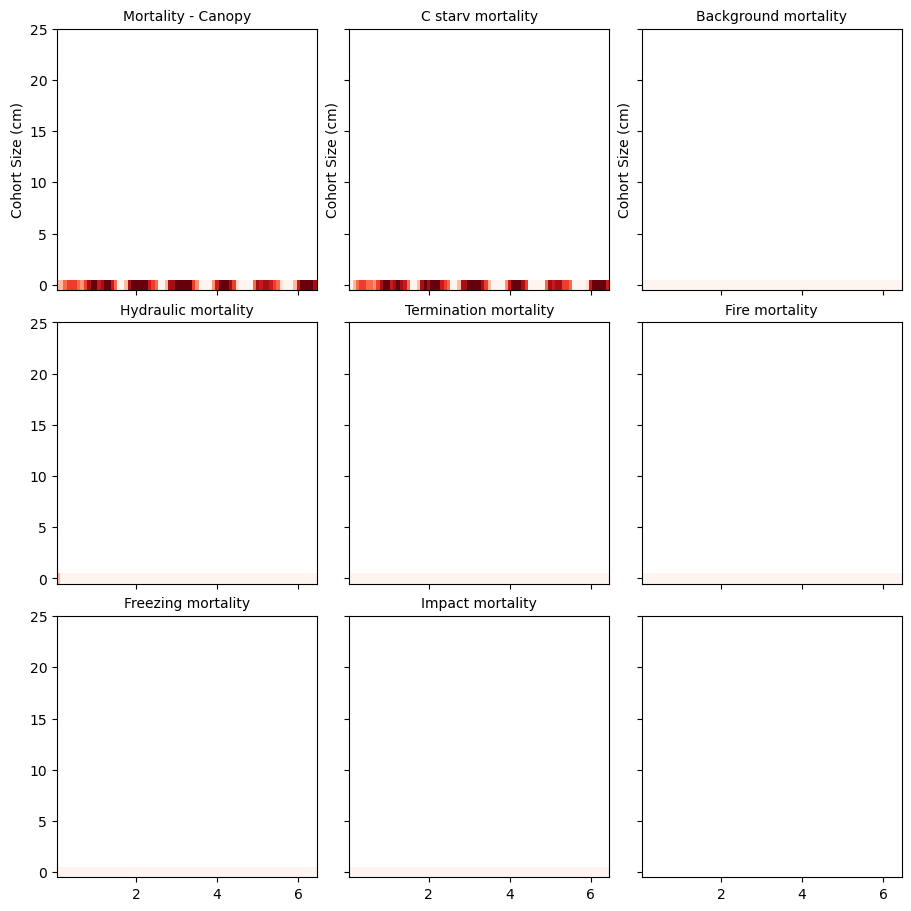

In [7]:
nplnt_sz_by_pft_canopy_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_CANOPY_SZPF, fates_def)
nplnt_canopy_def = nplnt_sz_by_pft_canopy_def[:,0,:,:,:]

nplnt_sz_by_pft_ustory_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_USTORY_SZPF, fates_def)
nplnt_ustory_def = nplnt_sz_by_pft_ustory_def[:,0,:,:,:]

nplnt_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_NPLANT_SZPF, fates_def)
nplnt_def = nplnt_sz_by_pft_def[:,0,:,:,:]

m_sz_by_pft_canopy_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_CANOPY_SZPF, fates_def)
m_canopy_def = m_sz_by_pft_canopy_def[:,0,:,:,:]  # PFT 1
m_canopy_def = m_canopy_def/nplnt_canopy_def
m_canopy_def = m_canopy_def[:,22,57,:]

m1_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_BACKGROUND_SZPF, fates_def)
m1_def = m1_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m1_def = m1_def/nplnt_def
m1_def = m1_def[:,22,57,:]

m2_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_HYDRAULIC_SZPF, fates_def)
m2_def = m2_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m2_def = m2_def/nplnt_def
m2_def = m2_def[:,22,57,:]

m3_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_CSTARV_SZPF, fates_def)
m3_def = m3_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m3_def = m3_def/nplnt_def
m3_def = m3_def[:,22,57,:]

m4_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_IMPACT_SZPF, fates_def)
m4_def = m4_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m4_def = m4_def/nplnt_def
m4_def = m4_def[:,22,57,:]

m5_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_FIRE_SZPF, fates_def)
m5_def = m5_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m5_def = m5_def/nplnt_def
m5_def = m5_def[:,22,57,:]

m6_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_TERMINATION_SZPF, fates_def)
m6_def = m6_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m6_def = m6_def/nplnt_def
m6_def = m6_def[:,22,57,:]

m8_sz_by_pft_def = fa.scpf_to_scls_by_pft(fates_def.FATES_MORTALITY_FREEZING_SZPF, fates_def)
m8_def = m8_sz_by_pft_def[:,0,:,:,:]  # PFT 1
m8_def = m8_def/nplnt_def
m8_def = m8_def[:,22,57,:]


levels = np.arange(0.,0.5, 0.05)
cmap = plt.get_cmap('Reds')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


fig1, ((f1ax0, f1ax1,f1ax2),(f1ax3,f1ax4,f1ax5),(f1ax6,f1ax7,f1ax8)) = plt.subplots(nrows=3,ncols=3,figsize=(9,9),
                                                                                    sharex=True,sharey=True,
                                                                                    constrained_layout=True)

im = f1ax0.pcolormesh(time, cohort_size_bins[0:5], m_canopy_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'Mortality - Canopy', fontsize=10)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax0.tick_params(labelsize=10)

im = f1ax1.pcolormesh(time, cohort_size_bins[0:5], m3_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'C starv mortality', fontsize=10)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax1.tick_params(labelsize=10)

im = f1ax2.pcolormesh(time, cohort_size_bins[0:5], m1_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax2.set_title(r'Background mortality', fontsize=10)
f1ax2.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax2.tick_params(labelsize=10)

im = f1ax3.pcolormesh(time, cohort_size_bins[0:5], m2_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax3.set_title(r'Hydraulic mortality', fontsize=10)
f1ax3.tick_params(labelsize=10)

im = f1ax4.pcolormesh(time, cohort_size_bins[0:5], m6_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax4.set_title(r'Termination mortality', fontsize=10)
f1ax4.tick_params(labelsize=10)

im = f1ax5.pcolormesh(time, cohort_size_bins[0:5], m5_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax5.set_title(r'Fire mortality', fontsize=10)
f1ax5.tick_params(labelsize=10)

im = f1ax6.pcolormesh(time, cohort_size_bins[0:5], m8_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax6.set_title(r'Freezing mortality', fontsize=10)
f1ax6.tick_params(labelsize=10)

im = f1ax7.pcolormesh(time, cohort_size_bins[0:5], m4_def[:,0:5].transpose(), 
                      cmap=cmap, norm=norm)
f1ax7.set_title(r'Impact mortality', fontsize=10)
f1ax7.tick_params(labelsize=10)




### Cstarv mortality by canopy layer

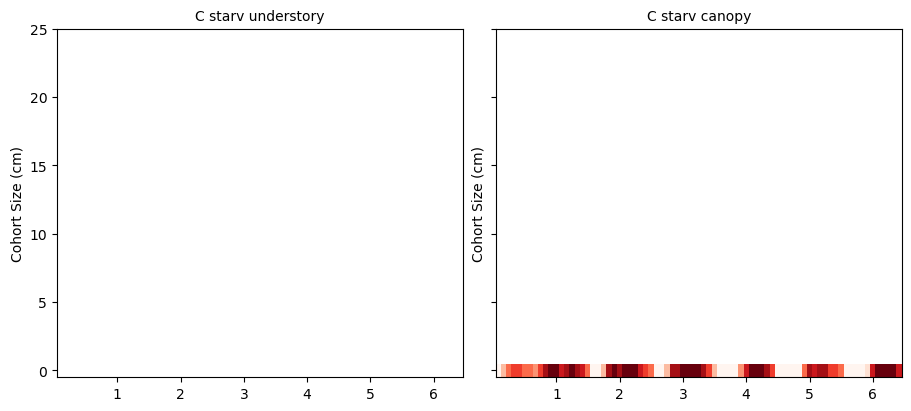

In [8]:
m3_sz_by_pft_ustory_def = fa.scpf_to_scls_by_pft(fates_def.FATES_M3_MORTALITY_USTORY_SZPF, fates_def)
m3_ustory_def = m3_sz_by_pft_ustory_def[:,0,:,:,:]  # PFT 1
m3_ustory_def = m3_ustory_def/nplnt_ustory_def
m3_ustory_def = m3_ustory_def[:,22,57,:]

m3_sz_by_pft_canopy_def = fa.scpf_to_scls_by_pft(fates_def.FATES_M3_MORTALITY_CANOPY_SZPF, fates_def)
m3_canopy_def = m3_sz_by_pft_canopy_def[:,0,:,:,:]  # PFT 1
m3_canopy_def = m3_canopy_def/nplnt_canopy_def
m3_canopy_def = m3_canopy_def[:,22,57,:]

fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(9,4),sharex=True,sharey=True,
                                                   constrained_layout=True)

im = f1ax0.pcolormesh(time, cohort_size_bins[0:5], m3_ustory_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'C starv understory', fontsize=10)
f1ax0.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax0.tick_params(labelsize=10)

im = f1ax1.pcolormesh(time, cohort_size_bins[0:5], m3_canopy_def[:,0:5].transpose(),
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'C starv canopy', fontsize=10)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=10)
f1ax1.tick_params(labelsize=10)
